<a href="https://colab.research.google.com/github/TanachaiAnakewat/WhiteWineDataAnalysis/blob/main/WhiteWineAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# プロジェクト

In [53]:
import pandas as pd
import numpy as  np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot  as plt
%matplotlib inline
# 必要なモジュールがあれば適宜追加してください

あなたは酒造会社のデータ分析部門の責任者です。ワインの理化学検査結果からワインの品質を予測するシステムの検討を行ってほしいとの依頼をCTO（最高技術責任者）から受けました。

Suppose you are the head of the data analysis department of a Sake brewing company, the CTO (Chief Technical Officer) asked you to investigate introducing a system that would predict the quality of wine based on the results of chemical inspections.

部門の新人で最近データ分析を勉強した部下が次のような分析を行い、実データ（UCI Machine Learning Repositoryに公開されているワインの品質データセットを使います）を用いて、ワインの理化学検査結果に基づく特徴量からワインの品質予測を以下のように試行しました。

One of the newly hired employees at your department, who has recently learned data analysis, conducted the following analysis. Using actual data (from the wine quality data set in the UCI Machine Learning Repository), he tried to predict the quality of wine based on the features derived from the chemical inspection results as follows.


以下では、***白ワイン***のデータセットを使用する。（赤ワインのデータセットではないことに注意してください）

[Wine Quality Data Set ](https://archive.ics.uci.edu/ml/datasets/wine+quality)

In the follwoing, we use the wine quality dataset for **white wine**. (Note that it is not the dataset for red wine). 

各ワインのデータは以下の11種類の特徴量からなる。

Each data point consists of the following 11 features.

- 1 - fixed acidity 
- 2 - volatile acidity 
- 3 - citric acid 
- 4 - residual sugar 
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10 - sulphates 
- 11 - alcohol 

各ワインには0から10の品質スコアが付与されており、11種類の特徴量を元にワインの品質を高品質（ワインのqualityが6以上）、低品質（ワインのqualityが6未満）の2値にして予測する2クラス分類問題を考える。

Each wine is assigned a quality score ranging from 0 to 10. Consider a binary classification problem in which we predict the wine quality as high quality (wine quality is 6 or higher) or low quality (wine quality is less than 6) based on the 11 features.

In [54]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/project/winequality-white.csv

--2023-01-10 16:34:35--  https://raw.githubusercontent.com/UTDataMining/2022A/master/project/winequality-white.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/plain]
Saving to: ‘winequality-white.csv.1’

winequality-white.c 100%[===================>] 258.23K  --.-KB/s    in 0.03s   

2023-01-10 16:34:35 (8.12 MB/s) - ‘winequality-white.csv.1’ saved [264426/264426]



In [55]:
# 白ワインデータセットの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";")

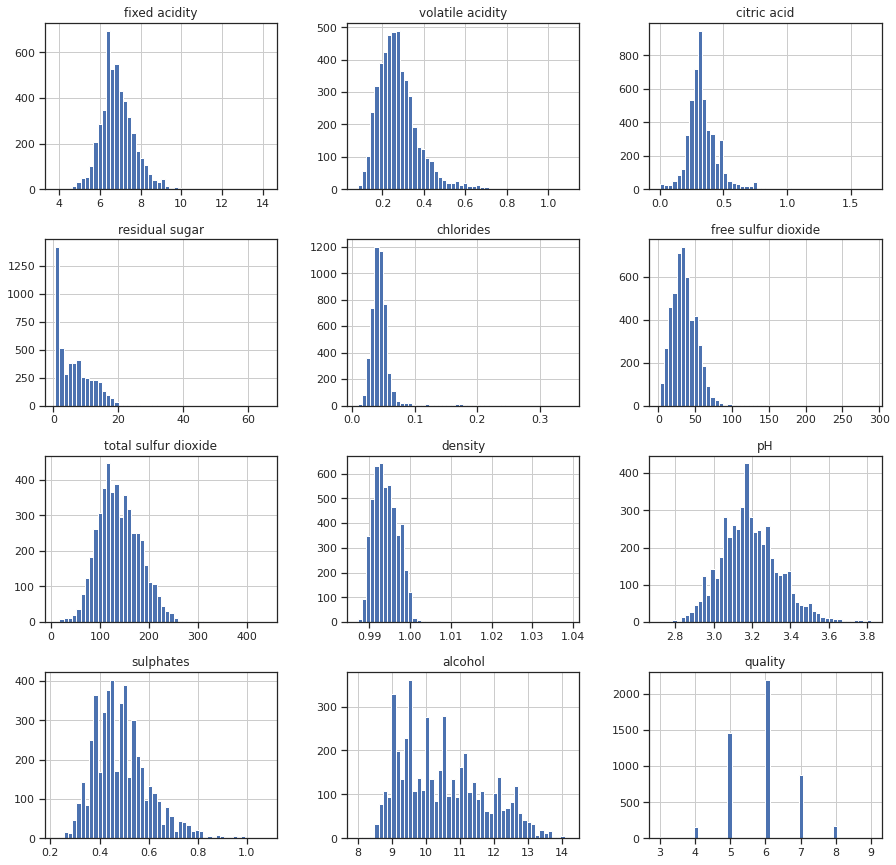

In [56]:
# 特徴量の分布
wine.hist(bins=50, figsize=(15,15));

In [57]:
# 特徴量間の相関
wine.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [58]:
# 入力データ
X = wine[ ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

# 正解ラベルを1（高品質：ワインのqualityが6以上）か0（低品質：ワインのqualityが6未満）とする
y=wine['quality'].values
y = (y>=6).astype(int) 
print(np.sum(y==1, axis=0)) # 高品質ワインデータの数
print(np.sum(y==0, axis=0)) # 低品質ワインデータの数

3258
1640


In [59]:
# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

In [60]:
# ロジスティック回帰モデル
lr=LogisticRegression(solver='liblinear',  multi_class='auto') 
lr.fit(X_train, y_train) # 訓練データで学習
y_pred = lr.predict(X_test) # テストデータで予測

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

[[158 170]
 [ 76 576]]
0.7489795918367347
0.7721179624664879
0.8834355828220859
0.8240343347639485


部下は、この分析を元にワインの品質予測の（2クラス分類としての）accuracyは75%となりそうです、と報告してきました。

Based on this experiment, your colleague reported that, the accuracy of the wine quality prediction (as a binary classification) would be about 75%.


## 課題
**上記のワインの理化学検査結果からの品質予測について、あなた自身で（部下に対して模範となるような）分析に行い、その分析の過程と結果についてレポートとしてまとめたものを作成して提出してください。**

- レポートは定められた様式に従って図表を含めて最大3ページまでとし、少なくとも1ページ以上は本文で構成してください（図表だけを貼り付けただけで説明がないものは不可）。
- レポートと合わせて分析に用いたコードも提出してください。

授業で未習の内容を取り入れてもらっても構いませんが、それを持って大きく加点することはありません。むしろ、授業で学んだ内容を元にまず、適切に分析を行っているか、その上で独自の創意工夫があるか、を主に評価します。

Conduct your own analysis (as an example to your colleague) of the wine quality prediction based on the chemical inspection results and summarize a report describing the process and results of your analysis.
- The report should be no more than three pages long, including figures and tables, and at least one page should consist of a text part (the report with only figures and tables is not accepted).
- Also submit the codes used in the analysis together with the report.

You may use advanced topics that you have not yet learned in the class. However, it won't always lead to significant marks. The evaluation is rather based on whether you have first conducted relevant analysis based on what you have learned in the class, and whether you have any original and creative ideas on top of that.

In [61]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


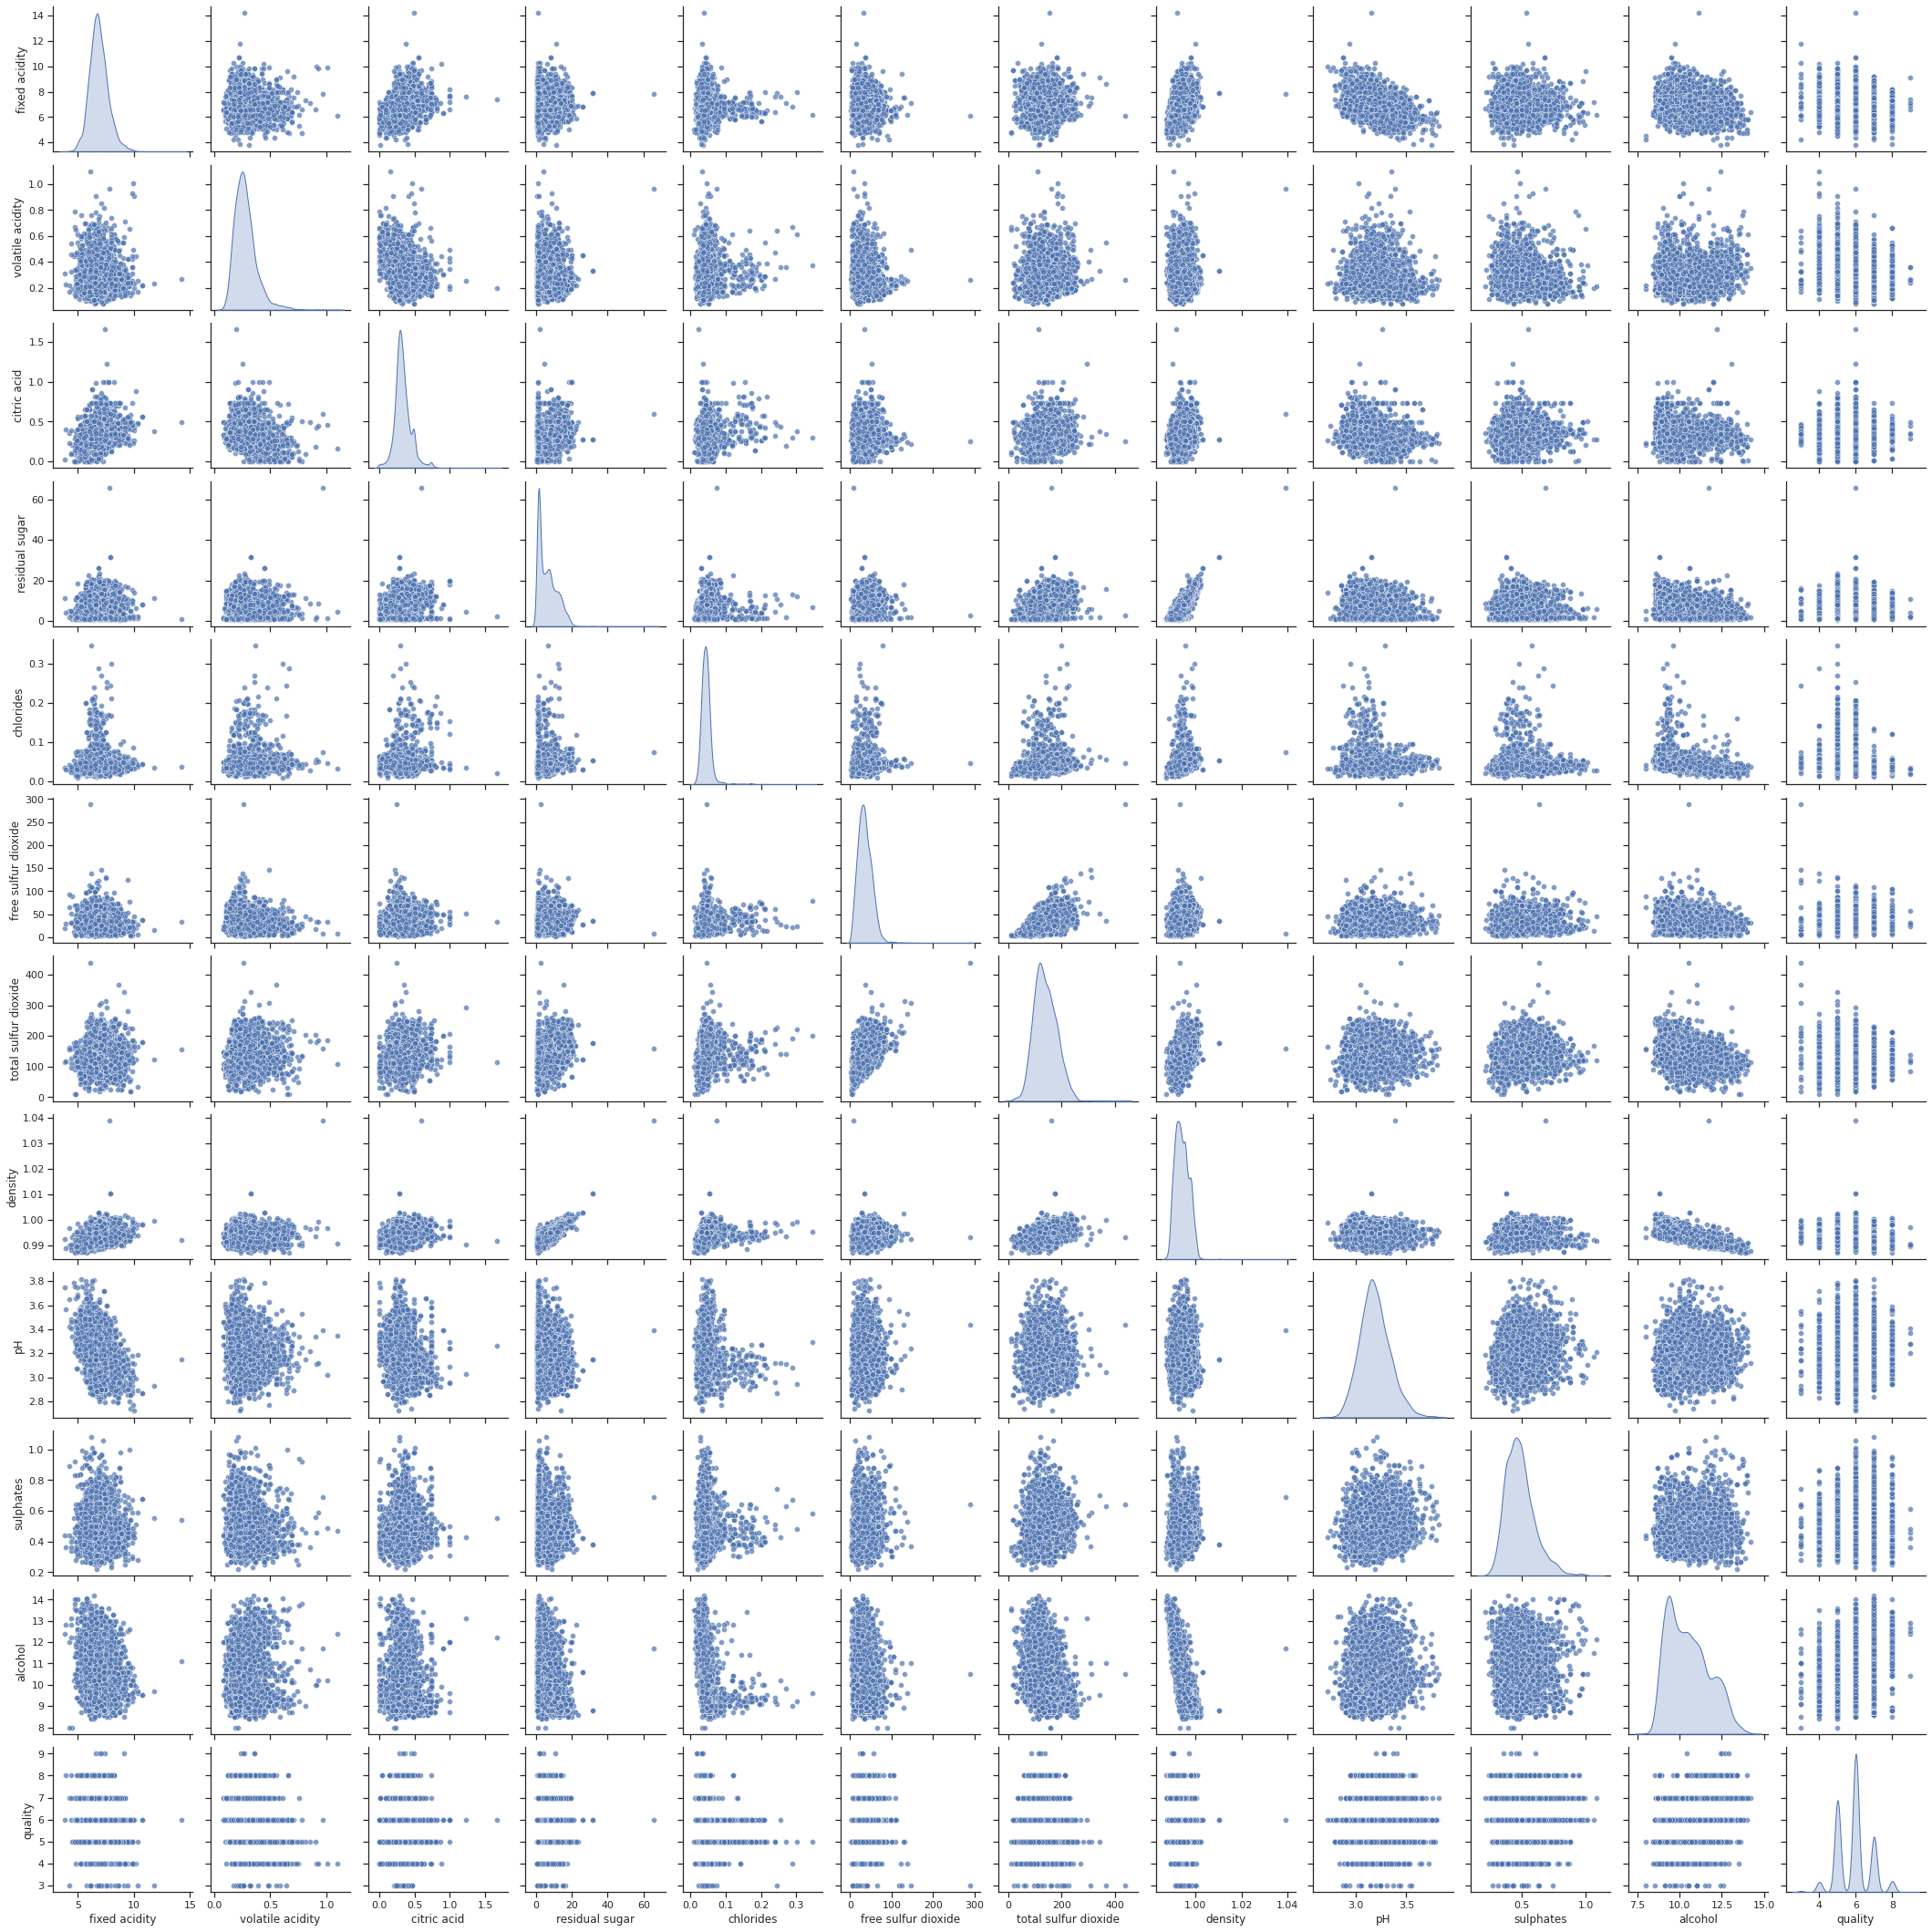

In [62]:
#try plot
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);
# Create a custom color palete

# Make the pair plot with a some aesthetic changes
sns.pairplot(wine, diag_kind = 'kde',  plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))

# Load Libraries

In [63]:
#load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost
import sklearn

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance



# 5-Fold Cross Validation between Models
* Logistic regression
* LinearSVC
* Decision tree
* Random forest
* XGBClassifier


In [64]:
classifiers = []

model1 = LogisticRegression(solver='liblinear',  multi_class='auto', max_iter=10000) 
classifiers.append(model1)

model2 = LinearSVC(max_iter=10000)
classifiers.append(model2)

model3 = DecisionTreeClassifier()
classifiers.append(model3)

model4 = RandomForestClassifier(random_state = 23)
classifiers.append(model4)

model5 = xgboost.XGBClassifier()
classifiers.append(model5)

In [65]:
from statistics import mean
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

for clf in classifiers:
    score_train = []
    score_test = []
    print(clf)
    for train_ind, test_ind in kfold.split(X):
      X_train = X[train_ind]
      y_train = y[train_ind]
      X_test = X[test_ind]
      y_test = y[test_ind]
      clf.fit(X_train, y_train)
      y_pred= clf.predict(X_test)
      acc = accuracy_score(y_test, y_pred)
      print("Accuracy = %s"%( acc))
      score_test.append(acc)
    print("Mean Accuracy of %s is %s"%(clf, mean(score_test)))
    print("----------------------------------")
    #cm = confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix of %s is"%(clf))
    #print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 #columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

LogisticRegression(max_iter=10000, solver='liblinear')
Accuracy = 0.7244897959183674
Accuracy = 0.7540816326530613
Accuracy = 0.7448979591836735
Accuracy = 0.7425944841675178
Accuracy = 0.7528089887640449
Mean Accuracy of LogisticRegression(max_iter=10000, solver='liblinear') is 0.743774572137333
----------------------------------
LinearSVC(max_iter=10000)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy = 0.6459183673469387


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy = 0.5724489795918367


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy = 0.37857142857142856


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy = 0.634320735444331


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy = 0.4811031664964249
Mean Accuracy of LinearSVC(max_iter=10000) is 0.542472535490192
----------------------------------
DecisionTreeClassifier()
Accuracy = 0.7744897959183673
Accuracy = 0.8020408163265306
Accuracy = 0.7673469387755102
Accuracy = 0.7681307456588355
Accuracy = 0.7875383043922369
Mean Accuracy of DecisionTreeClassifier() is 0.7799093202142962
----------------------------------
RandomForestClassifier(random_state=23)
Accuracy = 0.8173469387755102
Accuracy = 0.8479591836734693
Accuracy = 0.8469387755102041
Accuracy = 0.8375893769152196
Accuracy = 0.8345250255362615
Mean Accuracy of RandomForestClassifier(random_state=23) is 0.836871860082133
----------------------------------
XGBClassifier()
Accuracy = 0.763265306122449
Accuracy = 0.7836734693877551
Accuracy = 0.7775510204081633
Accuracy = 0.7895812053115424
Accuracy = 0.7773237997957099
Mean Accuracy of XGBClassifier() is 0.7782789602051239
----------------------------------


In [137]:
#train random forest
forest = RandomForestClassifier(random_state = 23)
forest.fit(X_train, y_train)
y_pred= forest.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%("RandomForestClassifier", acc))

Accuracy of RandomForestClassifier is 0.8345250255362615


# Feature Engineering

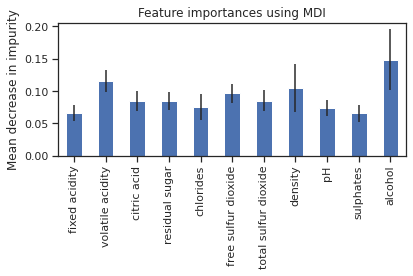

In [67]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

forest_importances = pd.Series(importances, index=wine.columns[:-1])
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

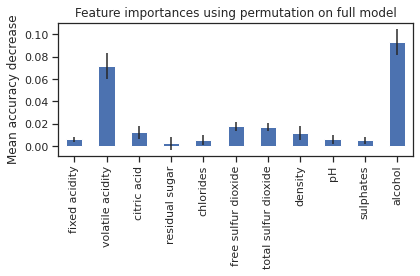

In [68]:

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=23, n_jobs=-1
)

forest_importances = pd.Series(result.importances_mean, index=wine.columns[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [135]:
important_feature_index = np.where(forest_importances.values > 0.005)[0]
print('Number of features for 5% importance:', len(important_feature_index))

Number of features for 5% importance: 10


In [70]:
important_feature_names = [wine.columns[index] for index in important_feature_index]

In [71]:
important_feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [72]:
X_train_important = X_train[:,important_feature_index]
X_test_important = X_test[:,important_feature_index]

In [86]:
# Sanity check on operations
print('Important train features shape:', X_train_important.shape)
print('Important test features shape:', X_test_important.shape)

Important train features shape: (3919, 10)
Important test features shape: (979, 10)


In [138]:
#trin random forest with only important feature
forest = RandomForestClassifier(random_state = 23)
forest.fit(X_train_important, y_train)
y_pred= forest.predict(X_test_important)
acc_importance = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%("RandomForestClassifie with important featurer", acc_importance))

print('Improvement of {:0.2f}%'.format( 100 * (acc_importance - acc) / acc))

Accuracy of RandomForestClassifie with important featurer is 0.8447395301327886
Improvement of 1.22%


# Hyperparameter Tuning

In [75]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}

In [128]:
from pprint import pprint
n_estimators =[int(x) for x in np.linspace(10, 200, num = 20)] # number of trees in the random forest
max_features = ['auto', 'sqrt',"log2"] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

#'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 6, 10],
 'n_estimators': [10,
                  20,
                  30,
                  40,
                  50,
                  60,
                  70,
                  80,
                  90,
                  100,
                  110,
                  120,
                  130,
                  140,
                  150,
                  160,
                  170,
                  180,
                  190,
                  200]}


In [129]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 23)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, scoring="f1", param_distributions = random_grid, n_iter = 100, cv = 3, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_important, y_train)

rf_random.best_params_

{'n_estimators': 170,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': False}

In [130]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    print('Model Performance')
    print('Accuracy = {:0.4f}'.format(accuracy))
    print("")
    
    return accuracy

base_model = RandomForestClassifier(random_state = 23)
base_model.fit(X_train_important , y_train)
base_accuracy = evaluate(base_model, X_test_important , y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_important, y_test)

print('Improvement of {:0.2f}%'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Accuracy = 0.8447

Model Performance
Accuracy = 0.8212

Improvement of -2.78%


In [131]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
# Several combination tested and this yield the best acccuracy
param_grid = {
    #'max_depth': [8,10,13],
    'max_features': ['auto'],
    'n_estimators': [80,90,100,110],
    #'min_samples_split': [2,3],
    #'min_samples_leaf': [2,4,6,8],
    'bootstrap': [True]
}
# Create a based model
rf = RandomForestClassifier(random_state = 23)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5,scoring = "balanced_accuracy")

In [132]:
grid_search.fit(X_train_important, y_train)
grid_search.best_params_

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 90}

In [139]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_important, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.8478

Improvement of 0.36%.


# Conclusion

In [134]:
y_pred = best_grid.predict(X_test_important)

print("Confusion Matrix :\n {}" .format(confusion_matrix(y_test, y_pred))) # confusion matrix
print("Accuracy : {}" .format(accuracy_score(y_test, y_pred))) # accuracy
print("Precision Score : {}" .format(precision_score(y_test, y_pred))) # precision
print("Recall : {}" .format(recall_score(y_test, y_pred))) # recall
print("f1 score : {}" .format(f1_score(y_test, y_pred)))  # fscore

Confusion Matrix :
 [[235  87]
 [ 62 595]]
Accuracy : 0.8478038815117467
Precision Score : 0.8724340175953079
Recall : 0.9056316590563166
f1 score : 0.888722927557879
